In [1]:
# Importando o dataset obtido no Kaggle
# https://www.kaggle.com/rhuebner/human-resources-data-set


import numpy as np
import pandas as pd

df = pd.read_csv("HR_Dataset.csv", sep=",", decimal=".")
df[0:4]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low


In [2]:
summary = df.describe()
print(summary)

       satisfaction_level  last_evaluation  number_project   
count        14999.000000     14999.000000    14999.000000  \
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left   
count          14999.000000        14999.000000   14999.000000  14999.000000  \
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

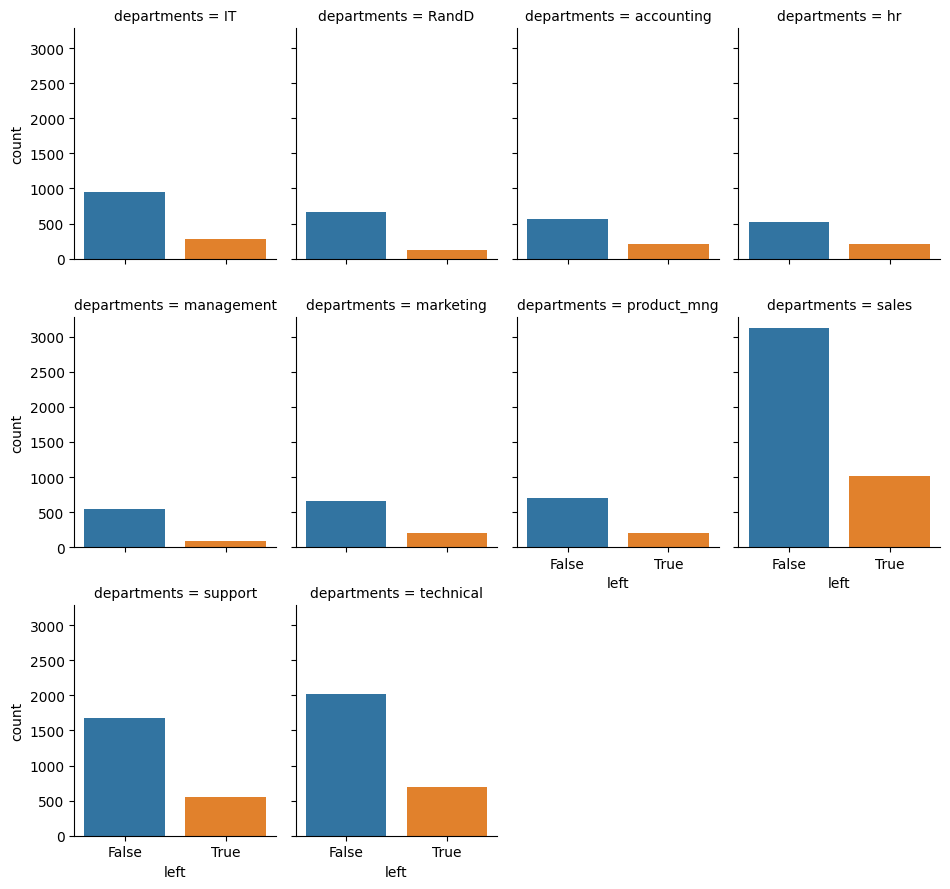

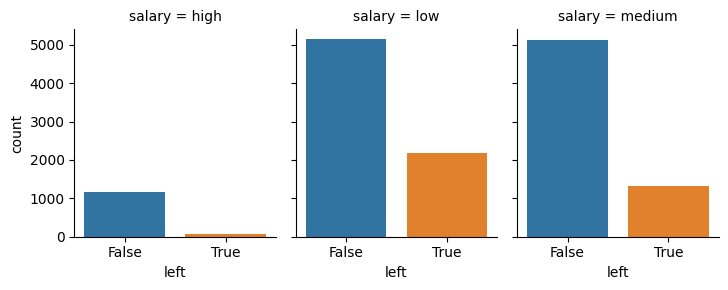

In [15]:
import seaborn as sns
g = sns.catplot(x="left", col="departments", col_wrap=4,
                data=df[df.left.notnull()],
                kind="count", height=3, aspect=0.8)
g = sns.catplot(x="left", col="salary", col_wrap=4,
                data=df[df.left.notnull()],
                kind="count", height=3, aspect=0.8)

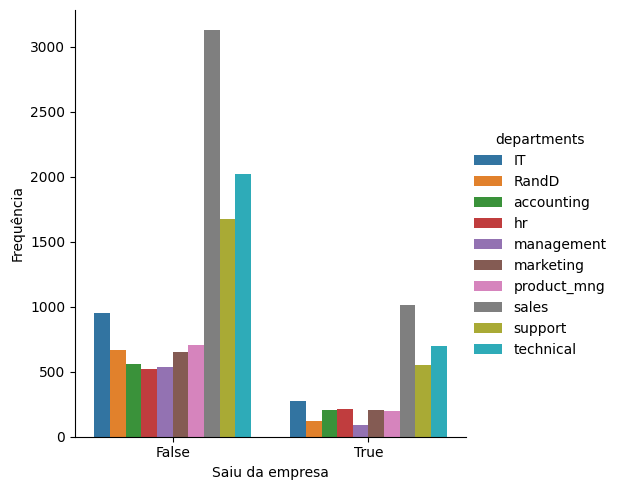

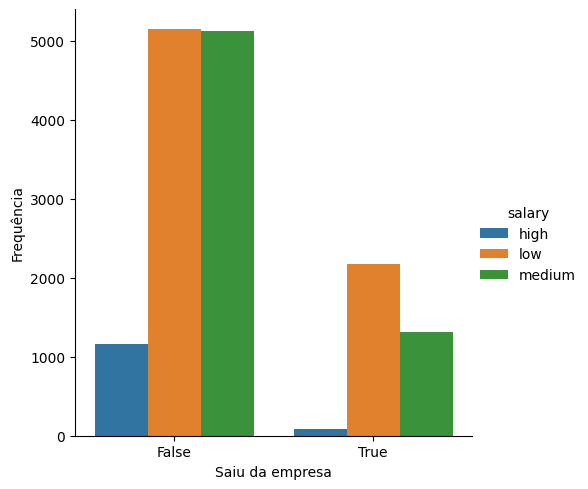

In [16]:
g=sns.catplot(x = "left", hue = "departments", kind = "count", data = data)
g.set(xlabel = 'Saiu da empresa', ylabel = 'Frequência')

f=sns.catplot(x = "left", hue = "salary", kind = "count", data = data)
f.set(xlabel = 'Saiu da empresa', ylabel = 'Frequência')

In [3]:
df["Work_accident"] = df["Work_accident"].astype("bool")
df["left"] = df["left"].astype("bool")
df["promotion_last_5years"] = df["promotion_last_5years"].astype("bool")
df["salary"] = df["salary"].astype("category")
df["Departments "] = df["Departments "].astype("category")
column_types = df.dtypes
print(column_types)


satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident                bool
left                         bool
promotion_last_5years        bool
Departments              category
salary                   category
dtype: object


In [4]:
df.rename(columns={'Departments ': 'departments'}, inplace=True)
column_names = df.columns
print(column_names)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')


Regressão Logistica Binaria com random undersampling e dummy nas variáveis salário e departamento
Counter({False: 4463, True: 3571})
Matriz Confusão
[[1023  292]
 [ 269  827]]
Acuracia: 0.7673
F1 Score:  0.7467


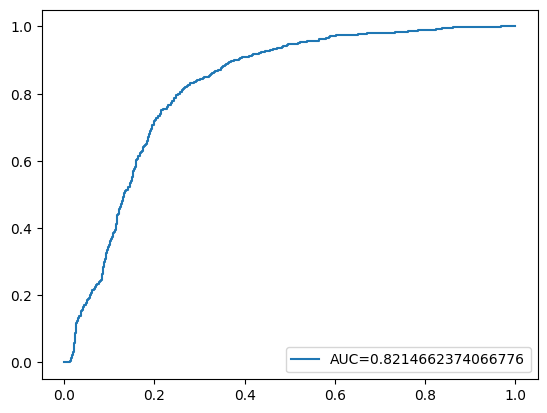

In [5]:
# Regressão Logistica Binaria com Random Undersampling 

# Livrarias usadas 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# Categorização das variáveis em numéricas e boleanas

data = df
data_df_dummies1 = pd.get_dummies(data, columns=["departments"])
data_df_dummies = pd.get_dummies(data_df_dummies1, columns=["salary"])
data_df_dummies["Work_accident"] = data_df_dummies["Work_accident"].astype("bool")
data_df_dummies["promotion_last_5years"] = data_df_dummies["promotion_last_5years"].astype("bool")
data_df_dummies["departments_IT"] = data_df_dummies["departments_IT"].astype("bool")
data_df_dummies["departments_RandD"] = data_df_dummies["departments_RandD"].astype("bool")
data_df_dummies["departments_management"] = data_df_dummies["departments_management"].astype("bool")
data_df_dummies["departments_marketing"] = data_df_dummies["departments_marketing"].astype("bool")
data_df_dummies["departments_sales"] = data_df_dummies["departments_sales"].astype("bool")
data_df_dummies["departments_support"] = data_df_dummies["departments_support"].astype("bool")
data_df_dummies["departments_technical"] = data_df_dummies["departments_technical"].astype("bool")
data_df_dummies["salary_high"] = data_df_dummies["salary_high"].astype("bool")
data_df_dummies["salary_low"] = data_df_dummies["salary_low"].astype("bool")
data_df_dummies["salary_medium"] = data_df_dummies["salary_medium"].astype("bool")
data_df_dummies["departments_product_mng"] = data_df_dummies["departments_product_mng"].astype("bool")
data_df_dummies["departments_hr"] = data_df_dummies["departments_hr"].astype("bool")
data_df_dummies["left"] = data_df_dummies["left"].astype("bool")


#definir variaveis preditoras e variavel de resposta
x = data_df_dummies[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years',
                      'departments_IT','departments_RandD','departments_hr','departments_management','departments_marketing','departments_product_mng',
                      'departments_sales','departments_support','departments_technical','salary_high','salary_low','salary_medium']]
y = data_df_dummies['left']


# Algoritmo para balancear a amostra

undersample = RandomUnderSampler(sampling_strategy='majority')
undersample = RandomUnderSampler(sampling_strategy=0.8)
X_over, y_over = undersample.fit_resample(x, y)
print("Regressão Logistica Binaria com random undersampling e dummy nas variáveis salário e departamento")

# Impresão da contagem para avaliar o balanceamento da amostra
print(Counter(y_over))

# Iniciamos o modelo logistico binario
log_regression = LogisticRegression(max_iter=10000)

# Separação de 70% treinamento e 30% teste
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,random_state=0)  
#ajustar o modelo usando a amostra de treinamento 
log_regression.fit(X_train,y_train)

# Usar modelo para fazer predições na amostra de teste
y_pred = log_regression.predict(X_test)


# Matriz confusão 
print('Matriz Confusão')
cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix1
print(cnf_matrix1)

# Mostar a acurácia
print("Acuracia:","%.4f" % metrics.accuracy_score(y_test, y_pred))

# Definição das metricas
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

print("F1 Score: ", "%.4f" % f1_score(y_test, y_pred))

# Criação da curva ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [6]:
# Impressão do nome das colunas para ajudar a montar o algoritmo acima
column_names = data_df_dummies.columns
print(column_names)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments_IT', 'departments_RandD',
       'departments_accounting', 'departments_hr', 'departments_management',
       'departments_marketing', 'departments_product_mng', 'departments_sales',
       'departments_support', 'departments_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')


In [7]:

data_df_dummies["Work_accident"] = data_df_dummies["Work_accident"].astype("bool")
data_df_dummies["promotion_last_5years"] = data_df_dummies["promotion_last_5years"].astype("bool")
data_df_dummies["departments_IT"] = data_df_dummies["departments_IT"].astype("bool")
data_df_dummies["departments_RandD"] = data_df_dummies["departments_RandD"].astype("bool")
data_df_dummies["departments_management"] = data_df_dummies["departments_management"].astype("bool")
data_df_dummies["departments_marketing"] = data_df_dummies["departments_marketing"].astype("bool")
data_df_dummies["departments_sales"] = data_df_dummies["departments_sales"].astype("bool")
data_df_dummies["departments_support"] = data_df_dummies["departments_support"].astype("bool")
data_df_dummies["departments_technical"] = data_df_dummies["departments_technical"].astype("bool")
data_df_dummies["salary_high"] = data_df_dummies["salary_high"].astype("bool")
data_df_dummies["salary_low"] = data_df_dummies["salary_low"].astype("bool")
data_df_dummies["salary_medium"] = data_df_dummies["salary_medium"].astype("bool")
data_df_dummies["departments_product_mng"] = data_df_dummies["departments_product_mng"].astype("bool")
data_df_dummies["departments_hr"] = data_df_dummies["departments_hr"].astype("bool")
data_df_dummies["departments_accounting"] = data_df_dummies["departments_accounting"].astype("bool")
data_df_dummies["left"] = data_df_dummies["left"].astype("bool")

In [8]:
# Ao verificar os tipos de variaveis e para executar os algoritmos abaixo, imprimimos o tipo de variavel de cada coluna
column_types = data_df_dummies.dtypes   
print(column_types)

satisfaction_level         float64
last_evaluation            float64
number_project               int64
average_montly_hours         int64
time_spend_company           int64
Work_accident                 bool
left                          bool
promotion_last_5years         bool
departments_IT                bool
departments_RandD             bool
departments_accounting        bool
departments_hr                bool
departments_management        bool
departments_marketing         bool
departments_product_mng       bool
departments_sales             bool
departments_support           bool
departments_technical         bool
salary_high                   bool
salary_low                    bool
salary_medium                 bool
dtype: object


In [9]:
# Nos certificamos que não tinha valores ausentes
na_count = df.isna().sum()
print(na_count)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64


In [10]:
import pandas as pd
from scipy import stats

# Partimos do dataset data_df_dummies para selecionar as colunas numericas e booleanas

# Separação dos nomes das colunas para usar mais abaixo
numeric_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
boolean_columns = ['Work_accident', 'promotion_last_5years', 'departments_IT', 'departments_RandD', 'departments_accounting', 'departments_hr', 'departments_management', 'departments_marketing', 'departments_product_mng', 'departments_sales', 'departments_support', 'departments_technical', 'salary_high', 'salary_low', 'salary_medium']

# Criamos o dataframe selected_df com as colunas numericas e booleanas
selected_df = data_df_dummies[numeric_columns + boolean_columns]

# Calculamos a matriz de correlações
correlation_matrix = selected_df.corr()

# Calculamos as correlações absolutas
absolute_correlation = correlation_matrix.abs()

# Escolhemos as variaveis com p-values < 0.05
correlated_variables = absolute_correlation[absolute_correlation < 0.05].stack().index.tolist()

# Filtramos a variaveis pelos p-value
sorted_correlated_variables = sorted(correlated_variables, key=lambda x: absolute_correlation.loc[x], reverse=True)

#  Impressão das variáveis correlacionadas, ordenadas com correlações estatisticamente significantes
for variables in sorted_correlated_variables:
    var1, var2 = variables
    correlation_value = correlation_matrix.loc[var1, var2]
    p_value = stats.ttest_ind(selected_df[var1], selected_df[var2]).pvalue
    if p_value < 0.05:
        print(f"Correlation between '{var1}' and '{var2}': {correlation_value} (p-value: {p_value})")


Correlation between 'departments_RandD' and 'departments_management': -0.04927388086214487 (p-value: 1.9254335519907328e-05)
Correlation between 'departments_management' and 'departments_RandD': -0.04927388086214487 (p-value: 1.9254335519907328e-05)
Correlation between 'promotion_last_5years' and 'departments_marketing': 0.04925272197552422 (p-value: 4.689715575811741e-58)
Correlation between 'departments_marketing' and 'promotion_last_5years': 0.04925272197552422 (p-value: 4.689715575811741e-58)
Correlation between 'departments_accounting' and 'departments_management': -0.04860956299873296 (p-value: 0.0001739354966739565)
Correlation between 'departments_management' and 'departments_accounting': -0.04860956299873296 (p-value: 0.0001739354966739565)
Correlation between 'departments_hr' and 'departments_management': -0.04766717989445069 (p-value: 0.002564189728583359)
Correlation between 'departments_management' and 'departments_hr': -0.04766717989445069 (p-value: 0.002564189728583359)


In [11]:
import pandas as pd
from scipy import stats

# Partimos da matriz de correações

# Calculamos a correlação absoluta 
absolute_correlation = correlation_matrix.abs()

# Escolhemos as variaveis com p-values < 0.05
correlated_variables = absolute_correlation[absolute_correlation < 0.05].stack().index.tolist()

# Ordenamos as variaveis com base nos valores p-value
sorted_correlated_variables = sorted(correlated_variables, key=lambda x: absolute_correlation.loc[x], reverse=True)

# Guardamos as variaveis com significancia estatistica 
# Iteramos pelas variaveis calculadas acima

significant_variables = []

for variables in sorted_correlated_variables:
    var1, var2 = variables
    correlation_value = correlation_matrix.loc[var1, var2]
    p_value = stats.ttest_ind(selected_df[var1], selected_df[var2]).pvalue
    if p_value < 0.05:
        significant_variables.append(var1)
        significant_variables.append(var2)

# Removemos variaveis duplicadas 
significant_variables = list(set(significant_variables))

# Imprimimos as variaveis
print("Significant Variables:")
for variable in significant_variables:
    print(variable)


Significant Variables:
departments_support
Work_accident
last_evaluation
departments_management
promotion_last_5years
departments_hr
departments_IT
departments_sales
departments_technical
departments_marketing
salary_medium
salary_high
departments_product_mng
departments_RandD
salary_low
departments_accounting
average_montly_hours
time_spend_company
number_project
satisfaction_level


In [12]:
# Correlação de Matthews para verificação de multicolinearidade

import pandas as pd
from sklearn.metrics import matthews_corrcoef


# Este metodo apenas se aplica as variaveis boleanas 
boolean_columns = ['Work_accident', 'promotion_last_5years', 'departments_IT', 'departments_RandD', 'departments_accounting', 'departments_hr', 'departments_management', 'departments_marketing', 'departments_product_mng', 'departments_sales', 'departments_support', 'departments_technical', 'salary_high', 'salary_low', 'salary_medium']

# Calculamos a matriz de correlação com o coefeciente de Matthews
correlation_matrix = pd.DataFrame(index=boolean_columns, columns=boolean_columns)
for var1 in boolean_columns:
    for var2 in boolean_columns:
        correlation_matrix.loc[var1, var2] = matthews_corrcoef(selected_df[var1], selected_df[var2])

# Definimos o threshold de correlação em 0.8
threshold = 0.8

# Encontramos a variaveis altamente correlacionadas
highly_correlated = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            variable_1 = correlation_matrix.columns[i]
            variable_2 = correlation_matrix.columns[j]
            highly_correlated.append((variable_1, variable_2))

# Imprimimos as variaveis e a correlação entre elas

if highly_correlated:
    print("Highly Correlated Variables:")
    for variables in highly_correlated:
        variable_1, variable_2 = variables
        correlation_value = correlation_matrix.loc[variable_1, variable_2]
        print(f"{variable_1} and {variable_2} (Correlation: {correlation_value})")
else:
    print("No highly correlated variables found.")


Highly Correlated Variables:
salary_low and salary_medium (Correlation: -0.8471442089844681)
